In [1]:
#着衣情報比較システム
#色の平均

In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import colour
import PIL.ImageDraw

def heikin_img(path):

    source_file = path
    source = PIL.Image.open(source_file)

    color_arr = np.array(source)
    w_size, h_size, n_color = color_arr.shape
    color_arr = color_arr.reshape(w_size * h_size, n_color)

    color_mean = np.mean(color_arr, axis=0)
    color_mean = color_mean.astype(int)
    color_mean = tuple(color_mean)

    im = PIL.Image.new('RGB', (1, 1), color_mean)
    im.save('YYY.png')
    a = cv2.imread('YYY.png')
    print(a)
    return a
    
def heikin_hikaku(a,b):
    imgA = cv2.cvtColor(a, cv2.COLOR_BGR2Lab)
    imgB = cv2.cvtColor(b, cv2.COLOR_BGR2Lab)
    print(colour.delta_E(imgA, imgB))
    
def saido_img(path):
    img = cv2.imread(path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #img2 = cv2.resize(img2,(400,400))
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.legend()
    plt.show()
    return hist_h

def kidoyoko_img(path):
    img = cv2.imread(path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img2 = cv2.resize(img2,(400,400))
    img3 = np.array(img2)
    height,width,channels=img2.shape[:3]
    luminanceList=[]
    counter=0
    r=1*img3[:, :, 0] + 0*img3[:, :, 1] + 0*img3[:, :, 2]
    g=0*img3[:, :, 0] + 1*img3[:, :, 1] + 0*img3[:, :, 2]
    b=0*img3[:, :, 0] + 0*img3[:, :, 1] + 1*img3[:, :, 2]
    for i in range(width):
        sumR=np.mean(r, axis=0)
        sumG=np.mean(g, axis=0)
        sumB=np.mean(b, axis=0)
        luminance = ( 0.298912 * sumR[i] + 0.586611 * sumG[i] + 0.114478 * sumB[i] )
        #if counter==0:
        #    luminanceList=[luminance]
        #    counter=1
        #else:
        #    luminanceList=np.vstack((luminanceList,luminance))
        luminanceList.append(luminance)
    plt.hist(luminanceList,50)
    plt.title("Luminance_yoko")
    plt.show()
    return luminanceList

def kidotate_img(path):
    img = cv2.imread(path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img2 = cv2.resize(img2,(400,400))
    img3 = np.array(img2)
    height,width,channels=img2.shape[:3]
    luminanceList=[]
    counter=0
    r=1*img3[:, :, 0] + 0*img3[:, :, 1] + 0*img3[:, :, 2]
    g=0*img3[:, :, 0] + 1*img3[:, :, 1] + 0*img3[:, :, 2]
    b=0*img3[:, :, 0] + 0*img3[:, :, 1] + 1*img3[:, :, 2]
    for i in range(height):
        sumR=np.mean(r, axis=1)
        sumG=np.mean(g, axis=1)
        sumB=np.mean(b, axis=1)
        luminance = ( 0.298912 * sumR[i] + 0.586611 * sumG[i] + 0.114478 * sumB[i] )
        luminanceList.append(luminance)
    plt.hist(luminanceList,50)
    plt.title("Luminance_tate")
    plt.show()
    return luminanceList

In [69]:
s1=heikin_img("/home/ta1ty0/Search2020/Image/TestTrim.png")
s2=heikin_img("/home/ta1ty0/Search2020/Image/Screenshot from 2021-03-14 02-27-16.png")
s3=heikin_img("/home/ta1ty0/Search2020/Image/TatesimaTrim.png")

heikin_hikaku(s1,s2)
heikin_hikaku(s2,s3)


[[[112  92  86]]]
[[[128 116 183]]]
[[[129 118 185]]]
[[ 21.03873302]]
[[ 0.83042444]]


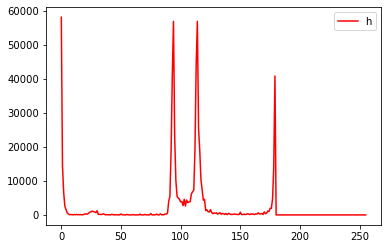

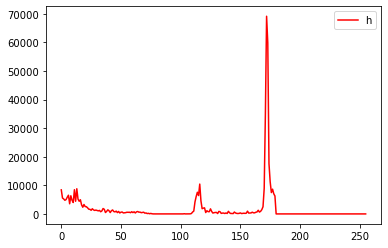

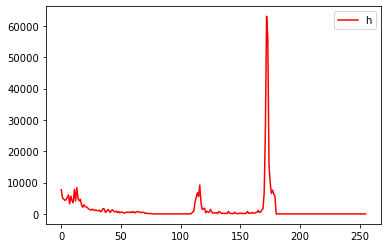

0.537042
0.997958


In [85]:
#彩度比較用プログラム。Opencv完全依存
import itertools

s1=saido_img("/home/ta1ty0/Search2020/Image/TestTrim.png")
s2=saido_img("/home/ta1ty0/Search2020/Image/Screenshot from 2021-03-14 02-27-16.png")
s3=saido_img("/home/ta1ty0/Search2020/Image/TatesimaTrim.png")

s1 = list(itertools.chain.from_iterable(s1))
s2 = list(itertools.chain.from_iterable(s2))
s3 = list(itertools.chain.from_iterable(s3))


corr1=corr(s1,s2)
corr1max=corr1.max()
print(corr1max)
corr2=corr(s2,s3)
corr2max=corr2.max()
print(corr2max)

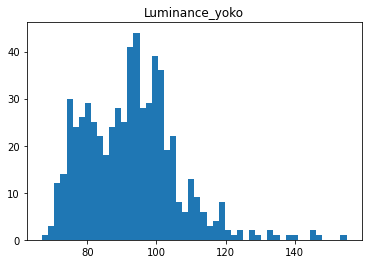

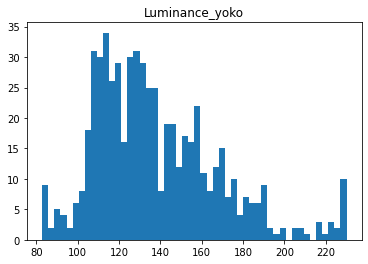

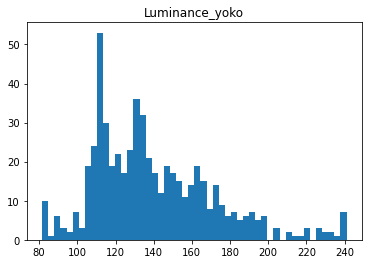

AttributeError: 'list' object has no attribute 'shape'

In [83]:
#CCFを使う.使えた

def corr(a,b):
    a = (a - np.mean(a)) / (np.std(a) * len(a))
    b = (b - np.mean(b)) / (np.std(b))
    c = np.correlate(a, b, 'full')
    return c

s1=kidoyoko_img("/home/ta1ty0/Search2020/Image/TestTrim.png")
s2=kidoyoko_img("/home/ta1ty0/Search2020/Image/Screenshot from 2021-03-14 02-27-16.png")
s3=kidoyoko_img("/home/ta1ty0/Search2020/Image/TatesimaTrim.png")

print(s1.shape)
corr1=corr(s1,s2)
corr1max=corr1.max()
print(corr1max)
corr2=corr(s2,s3)
corr2max=corr2.max()
print(corr2max)

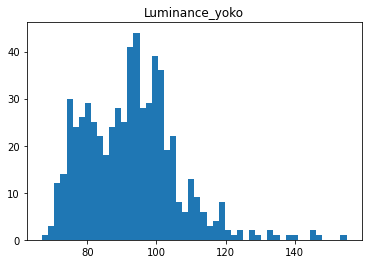

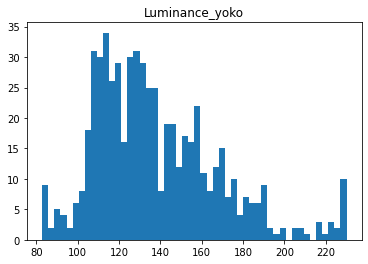

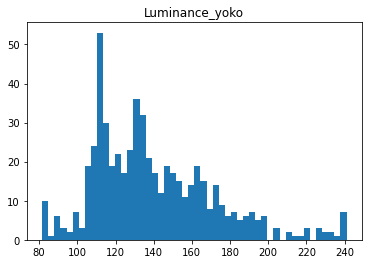

0.988166220835
0.837168468068


In [14]:
#Histogram Intersectionを使用。全く違うものを一致したとかいうので使えない
import pandas as pd

s1=kidoyoko_img("/home/ta1ty0/Search2020/Image/TestTrim.png")
s2=kidoyoko_img("/home/ta1ty0/Search2020/Image/Screenshot from 2021-03-14 02-27-16.png")
s3=kidoyoko_img("/home/ta1ty0/Search2020/Image/TatesimaTrim.png")


def histogram_intersection(h1, h2):
    sm = 0
    h  = 0
    for i in range(400):
        sm += min(h1[i], h2[i])
        h += h1[i]
    sm = sm/h
    return sm

print(histogram_intersection(s1,s2))

print(histogram_intersection(s2,s3))

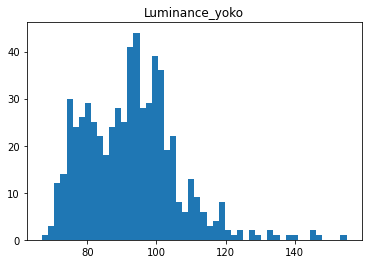

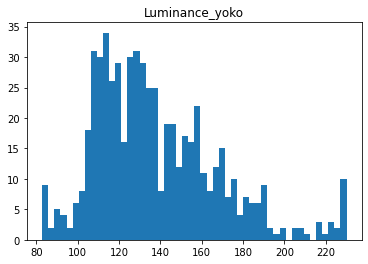

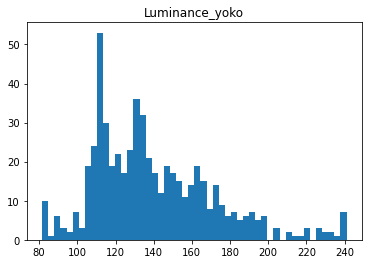

AttributeError: 'list' object has no attribute 'astype'

In [15]:
#pandasのCorrを使用したもの。結論としては少しずれると駄目なので今回の用途には使えない
import pandas as pd

s1=kidoyoko_img("/home/ta1ty0/Search2020/Image/TestTrim.png")
s2=kidoyoko_img("/home/ta1ty0/Search2020/Image/Screenshot from 2021-03-14 02-27-16.png")
s3=kidoyoko_img("/home/ta1ty0/Search2020/Image/TatesimaTrim.png")

s1=s1.astype(numpy.float32)
s2=s2.astype(numpy.float32)
s3=s1.astype(numpy.float32)

print(cv2.compareHist(s1, s2, 0))
print(cv2.compareHist(s2, s3, 0))

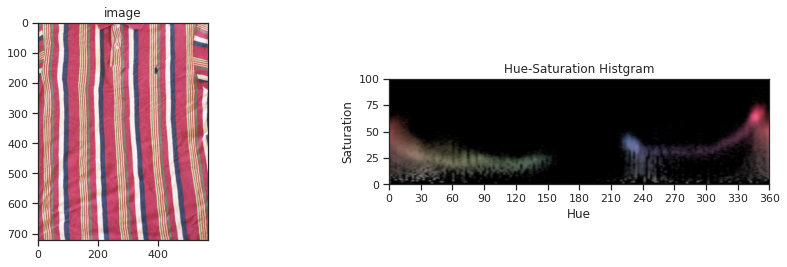

In [3]:
import numpy as np
import scipy.stats as sstats
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import cv2

%matplotlib inline

def hs_hist(rgb_img):
    """
    [目的]
    「横軸に 色相 , 縦軸に 彩度 をとり、
    点(H,S)における頻度を 明度 で表現するグラフ」を作りたい。
    
    [実装]
    入力のRGB画像をHSVに変換し、(H, S)の二次元ヒストグラムを計算して(H, S, 頻度)の配列を作る。
    その配列をHSV2RGBとして変換し、RGB画像としてimshowに表示させる関数。
    """
    sns.set()
    sns.set_style(style='ticks')
    
    img_hsv= cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

    # (H,S) だけにして、H,Sも分離
    hs_2d = img_hsv[:,:,0:2].reshape(-1,2)
    h = hs_2d[:,0]
    s = hs_2d[:,1]

    # ヒストグラムのbinの設定。OpenCVにおいてHの値域は0~180である（0-255に納めるためか）
    hedges = np.arange(0,180)
    sedges = np.arange(0,255)

    # 二次元ヒストグラム
    H, xedges, yedges = np.histogram2d(h,s, bins=(hedges, sedges))
    H = H.T

    # log scaleで偏りを緩和 & 正規化
    H_log = np.log(H+1)
    H_norm = H_log/H_log.max()*255

    # (H,S,頻度)の配列にするために、まずH[S]を縦[横]にリピートし、x行y列の配列にする
    x = H_norm.shape[1]
    y = H_norm.shape[0]
    hue_xy = np.repeat(xedges[:-1],y).reshape(x,y).T
    sat_xy = np.repeat(yedges[:-1],x).reshape(y,x)

    # depth方向にくっつけて、(H,S,頻度)の配列にする。uint8型でないとcvtColorが受けつけないらしい
    HS_hist = np.dstack((hue_xy, sat_xy, H_norm)).astype('uint8')
    HS_hist_im = cv2.cvtColor(HS_hist, cv2.COLOR_HSV2RGB)
    HS_hist_im = cv2.resize(HS_hist_im,(360,100))

    # 以下、元の画像をax1に、ヒストグラムをax2に表示する
    fig = plt.figure(figsize=[15,4])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.imshow(rgb_img)
    ax1.set_title('image')

    ax2.set_title('Hue-Saturation Histgram')
    ax2.set_xlabel('Hue')
    ax2.set_ylabel('Saturation')
    ax2.set_xticks(np.linspace(0,360,13))
    ax2.set_xlim(0,360)
    ax2.set_ylim(0,100)
    ax2.imshow(HS_hist_im,origin='lower',interpolation='bicubic')

    plt.show() 
wiz = cv2.cvtColor(cv2.imread('TatesimaTrim.png',1), cv2.COLOR_BGR2RGB)
hs_hist(wiz)

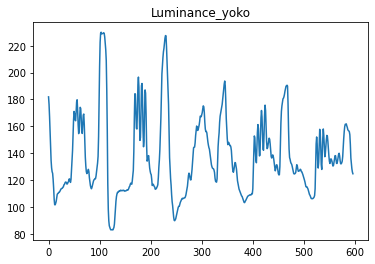

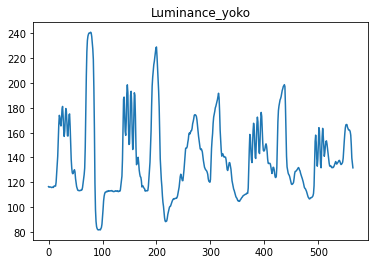

14299.851617361866


In [21]:
#difflibを使用したもの。結論としては少しずれると駄目なので今回の用途には使えない

#s1=saido_img("/home/ta1ty0/Search2020/Image/TestTrim.png")
s2=kidoyoko_img("/home/ta1ty0/Search2020/Image/Screenshot from 2021-03-14 02-27-16.png")
s3=kidoyoko_img("/home/ta1ty0/Search2020/Image/TatesimaTrim.png")

for train_img in s2:
    res=np.linalg.norm(train_img - s2,ord=1)

print(res)
for train_img in s2:
    res=np.dot(train_img,s3) / (np.linalg.norm(train_img) * np.linalg.norm(s3))
    

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def heikin_img(path):
    img= cv2.imread(path)
    imgx = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img2 = cv2.resize(imgx , (int(1), int(1)))
    img3 = cv2.resize(img2 , (int(100), int(100)))
    print(img2)
    return img2

def saido_img(path):
    img = cv2.imread(path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #img2 = cv2.resize(img2,(400,400))
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.legend()
    plt.show()
    return hist_h

def kidoyoko_img(path):
    img = cv2.imread(path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img2 = cv2.resize(img2,(400,400))
    img3 = np.array(img2)
    height,width,channels=img2.shape[:3]
    luminanceList=[]
    counter=0
    r=1*img3[:, :, 0] + 0*img3[:, :, 1] + 0*img3[:, :, 2]
    g=0*img3[:, :, 0] + 1*img3[:, :, 1] + 0*img3[:, :, 2]
    b=0*img3[:, :, 0] + 0*img3[:, :, 1] + 1*img3[:, :, 2]
    for i in range(width):
        sumR=np.mean(r, axis=0)
        sumG=np.mean(g, axis=0)
        sumB=np.mean(b, axis=0)
        luminance = ( 0.298912 * sumR[i] + 0.586611 * sumG[i] + 0.114478 * sumB[i] )
        #if counter==0:
        #    luminanceList=[luminance]
        #    counter=1
        #else:
        #    luminanceList=np.vstack((luminanceList,luminance))
        luminanceList.append(luminance)
    plt.plot(luminanceList)
    plt.plot(luminanceList)
    plt.title("Luminance_yoko")
    plt.show()
    return luminanceList

def kidotate_img(path):
    img = cv2.imread(path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img2 = cv2.resize(img2,(400,400))
    img3 = np.array(img2)
    height,width,channels=img2.shape[:3]
    luminanceList=[]
    counter=0
    r=1*img3[:, :, 0] + 0*img3[:, :, 1] + 0*img3[:, :, 2]
    g=0*img3[:, :, 0] + 1*img3[:, :, 1] + 0*img3[:, :, 2]
    b=0*img3[:, :, 0] + 0*img3[:, :, 1] + 1*img3[:, :, 2]
    for i in range(height):
        sumR=np.mean(r, axis=1)
        sumG=np.mean(g, axis=1)
        sumB=np.mean(b, axis=1)
        luminance = ( 0.298912 * sumR[i] + 0.586611 * sumG[i] + 0.114478 * sumB[i] )
        luminanceList.append(luminance)
    plt.plot(luminanceList)
    plt.title("Luminance_tate")
    plt.show()
    return luminanceList